In [1]:
variable_file = "Places365_val_00005752_1.jpg"

In [2]:
from keras.preprocessing import image
import tensorflow as tf
import os
import numpy as np
import seaborn as sns
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [3]:
picture = Image.open(variable_file)
picture.save("original.jpg")

In [4]:
fotos_mod = []                     #here we will save the image
img = image.img_to_array(picture)      #transform the image in an array
img = img/255.                     #normalices the array
fotos_mod.append(img)              #'save' the image in fotos_mod

x = np.array(fotos_mod)            #turns fotos_mod to an array

model = tf.keras.models.load_model('model_1.h5')      #load the pretrained model

test_predictions = model.predict(x)                   #obtains the new image with the model

In [5]:
b = test_predictions.shape[1:4]
c = test_predictions.reshape(b)
modify = Image.fromarray((c * 255).astype(np.uint8))
modify.save('modify.jpg')

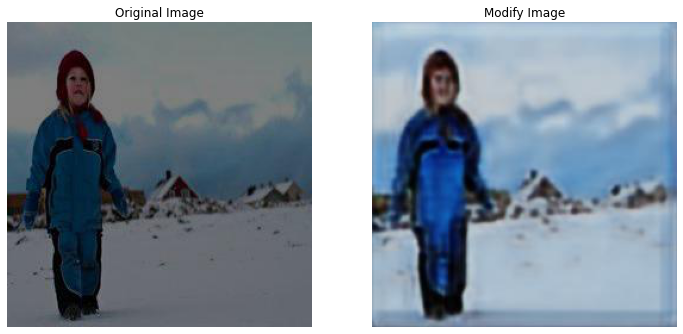

In [6]:
plt.rcParams["figure.figsize"] = [12,12]

fig, axarr = plt.subplots(1,2)

axarr[0].imshow(mpimg.imread('original.jpg'))
axarr[0].set_title("Original Image")
axarr[0].axis('off')

axarr[1].imshow(mpimg.imread('modify.jpg'))
axarr[1].set_title("Modify Image")
axarr[1].axis('off')

plt.show()
